In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

### Loading dataset

In [3]:
## Loading the dataset
DATA_PATH = '../input/house-prices-advanced-regression-techniques/'
df_train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [4]:
df = pd.concat([df_test.assign(ind="test"), df_train.assign(ind="train")])

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,ind,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,6,2010,WD,Normal,test,NaN
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Gar2,12500,6,2010,WD,Normal,test,NaN
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,3,2010,WD,Normal,test,NaN
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2010,WD,Normal,test,NaN
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,NaN,NaN,NaN,0,1,2010,WD,Normal,test,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

### Missing data handling

,Total,Percent
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
SalePrice,1459,49.982871
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageCond,159,5.447071
GarageQual,159,5.447071
GarageFinish,159,5.447071


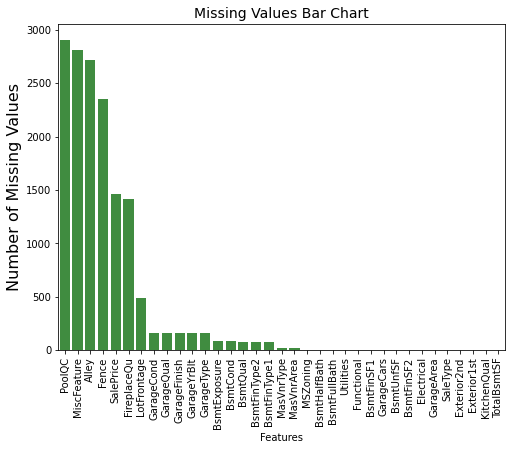

In [8]:
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    missing_data = ms["Total"]
    plt.figure(figsize=(8, 6))
    sns.barplot(x=missing_data.index, y=missing_data.values,color="green",alpha=0.8)
    plt.title('Missing Values Bar Chart',fontsize = 14)
    plt.xlabel('Features',fontsize = 10)
    plt.xticks(rotation=90)
    plt.ylabel('Number of Missing Values',fontsize = 16)
    return ms
missingdata(df)

In [9]:
# Delete the features which missing data over 90%
df = df.loc[:, df.isnull().mean() < .9]
df.shape

(2919, 79)

### Handling the features in dataset

* Object
* Numerical(discrete)
* Numerical(continuous)

In [10]:
#Turn the features with type'object' into the list 
df_train_categorical = df.select_dtypes(include=['object']).columns.tolist() 
print(len(df_train_categorical))

41


In [11]:
#Get the dataset which is numerical
df_train_numeric = df.select_dtypes(exclude=['object']).columns.tolist()

In [12]:
# Get the year feature
df_year_feature = [year_feature for year_feature in df_train_numeric if 'Yr' in year_feature or 'Year' in year_feature ]
print(df_year_feature)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


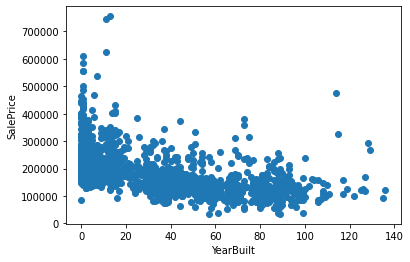

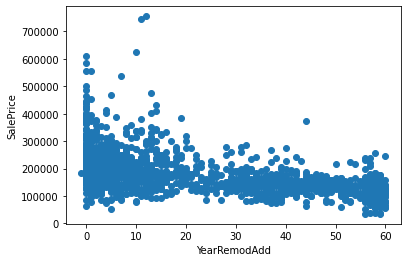

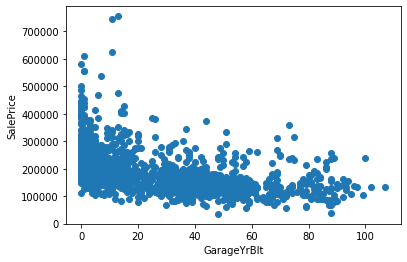

In [13]:
for feature in df_year_feature:
    if feature!= 'YrSold':
        data = df.copy()
        data[feature] = data['YrSold']-data[feature]
        plt.scatter(data[feature], data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

In [16]:
# Check whether there are same row
df_train.duplicated().sum()

0

In [17]:
# get the discrete number
discrete_df = [feature for feature in df_train_numeric if len(df[feature].unique())<25 and feature not in df_year_feature+["ID"] ]

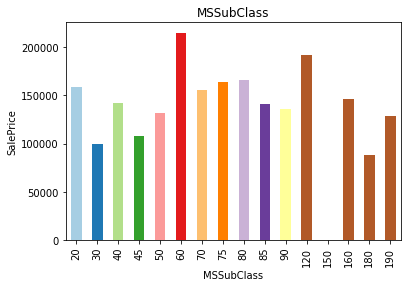

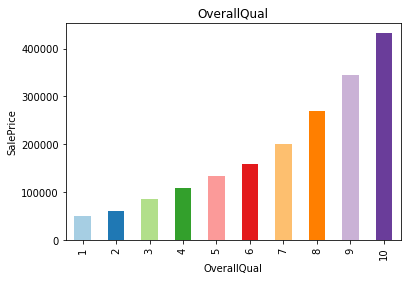

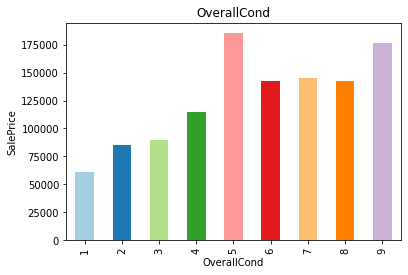

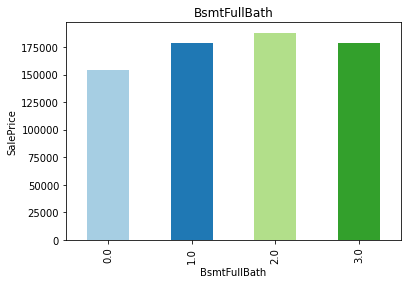

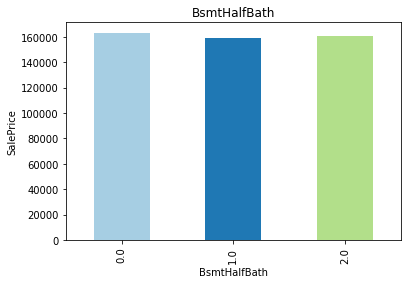

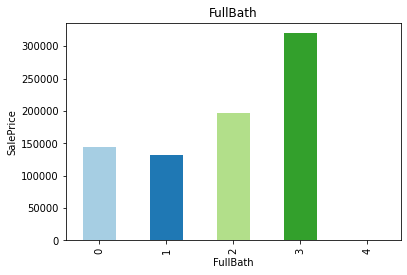

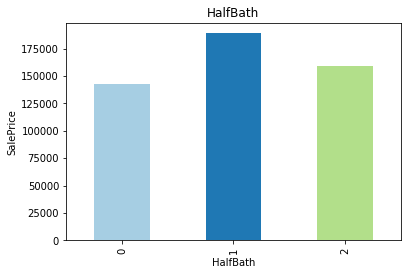

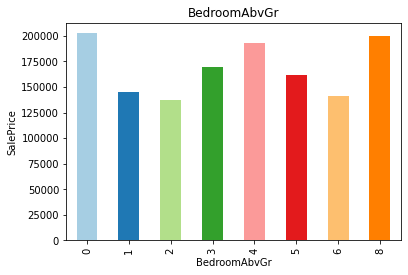

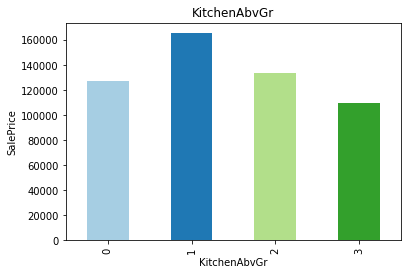

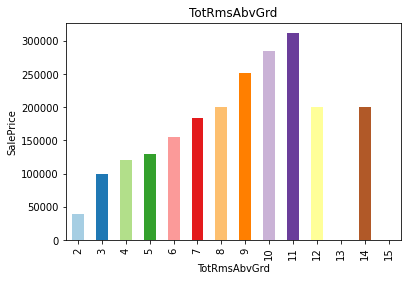

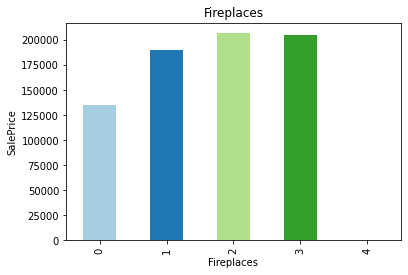

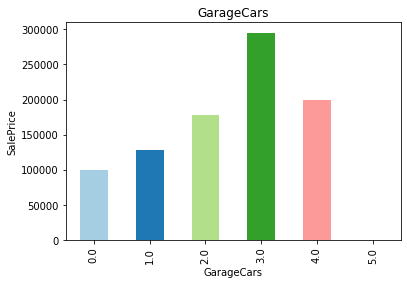

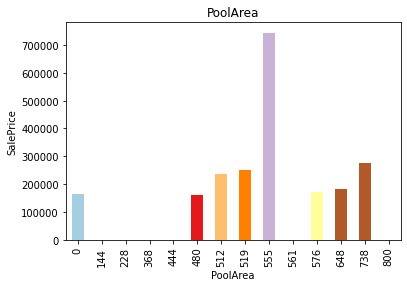

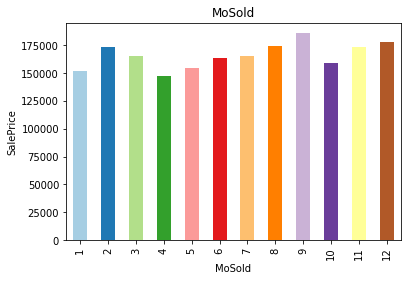

In [18]:
for feature in discrete_df:
    N=25
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar(color=plt.cm.Paired(np.arange(N)))
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [19]:
# Get the continuous number
continous_df = [feature for feature in df_train_numeric if feature not in discrete_df+['Id']+df_year_feature+['SalePrice']]

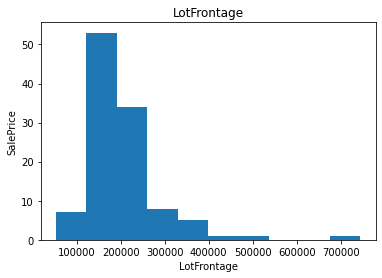

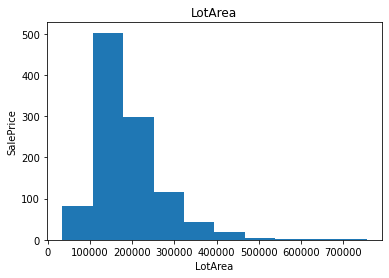

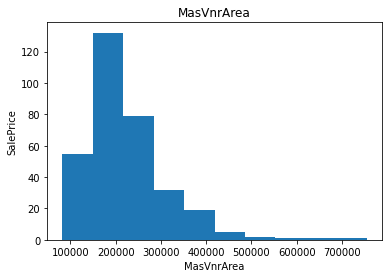

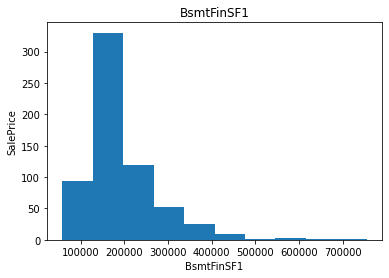

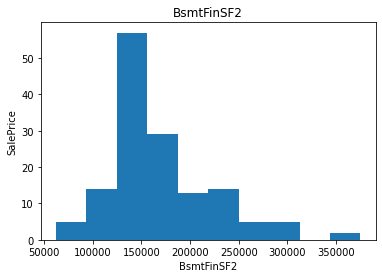

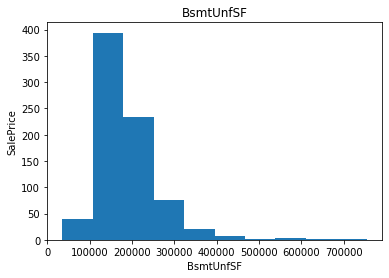

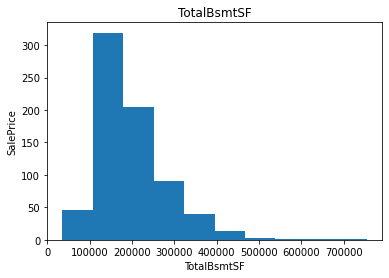

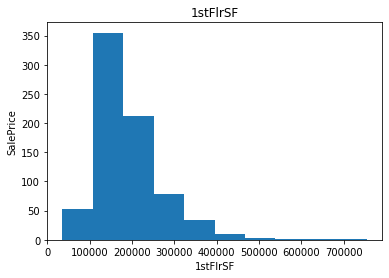

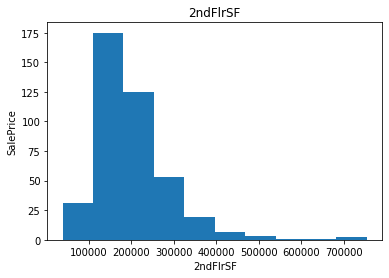

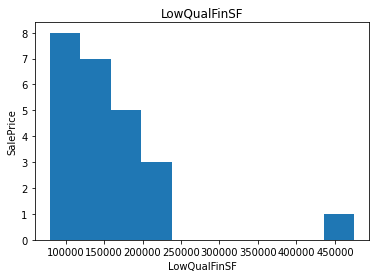

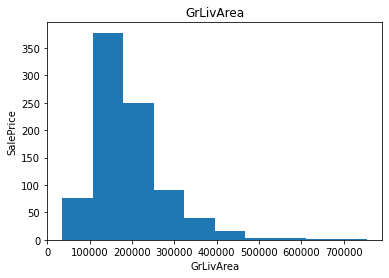

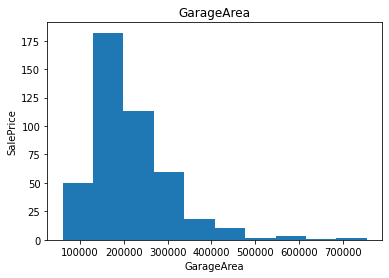

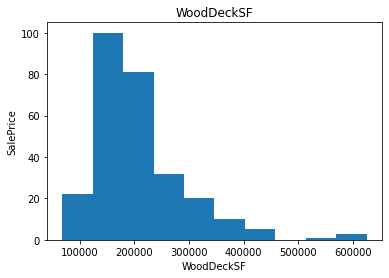

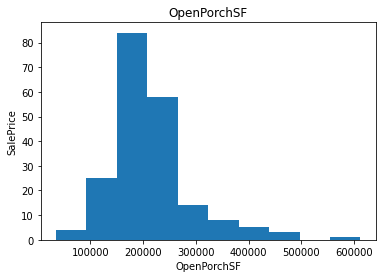

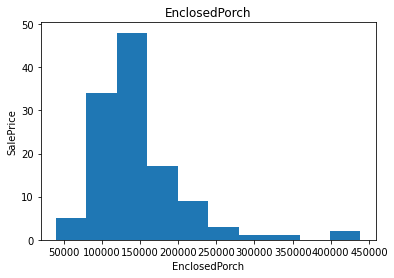

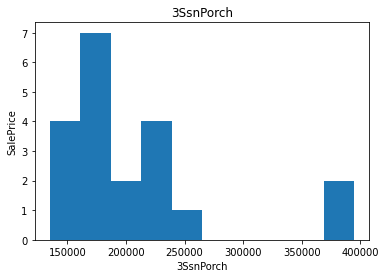

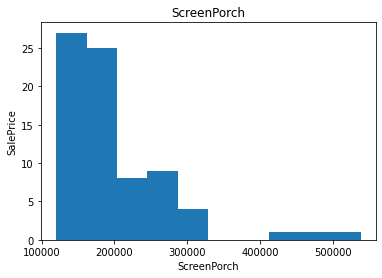

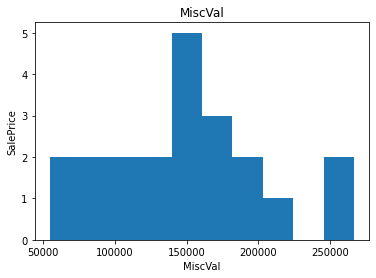

In [20]:
for feature in continous_df:
    data = df_train.copy()
    data.groupby(feature)['SalePrice'].median().plot.hist()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

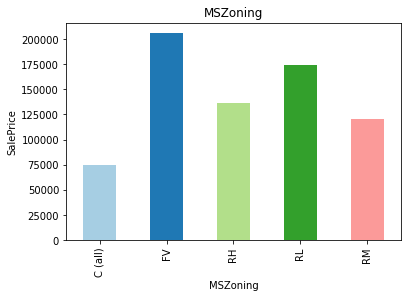

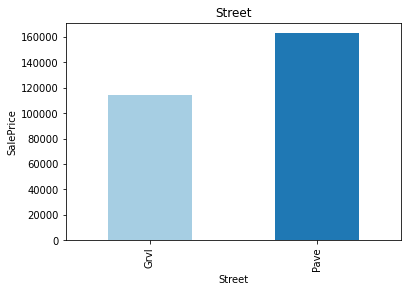

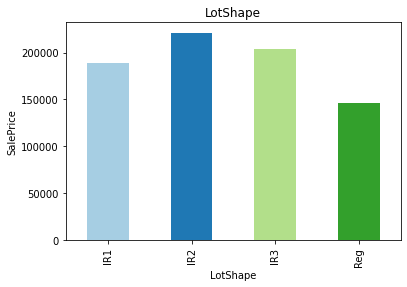

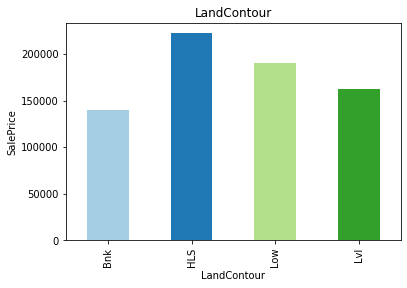

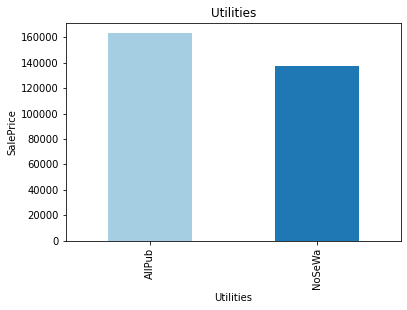

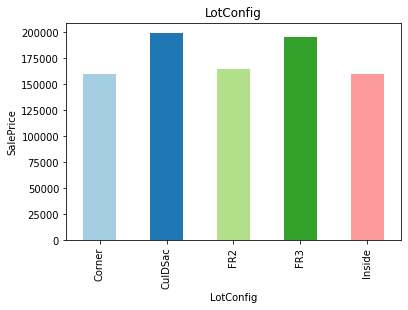

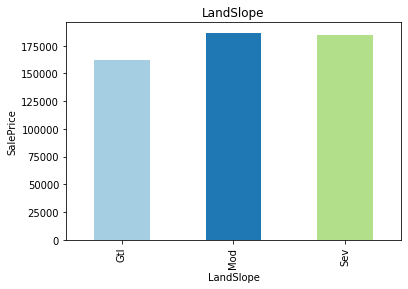

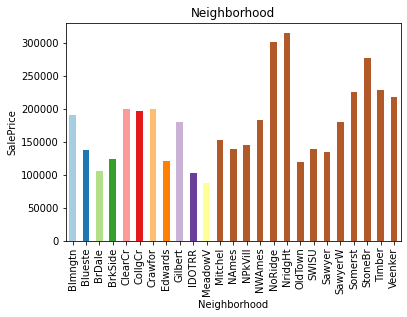

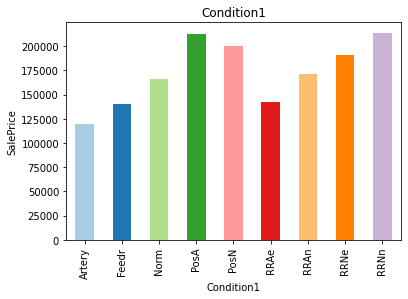

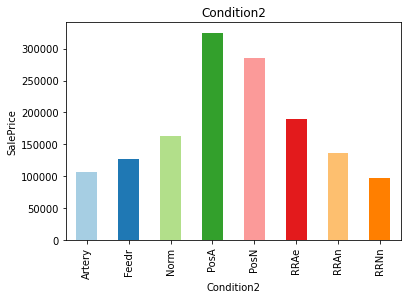

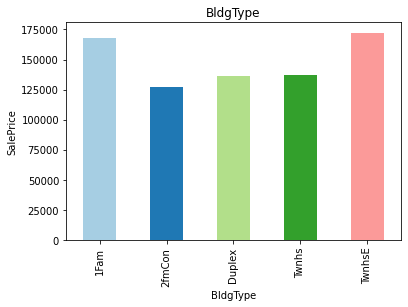

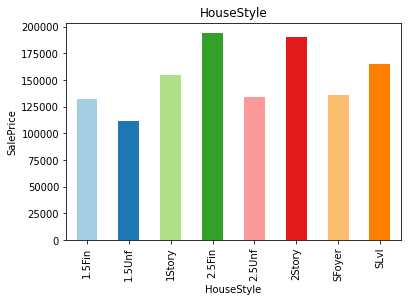

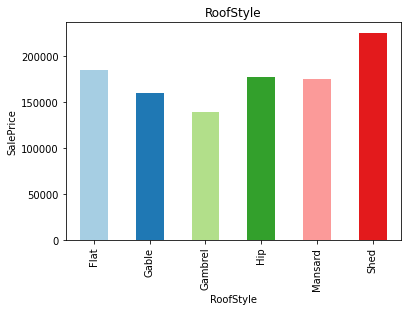

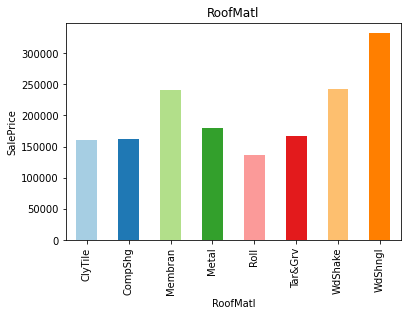

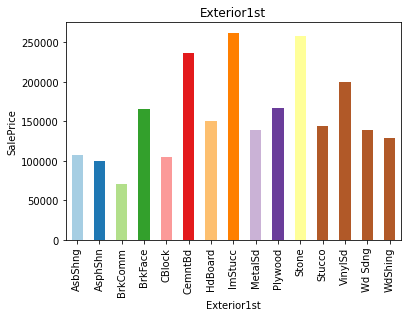

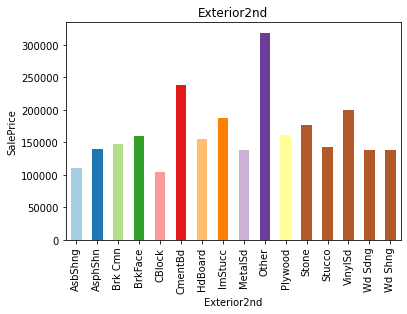

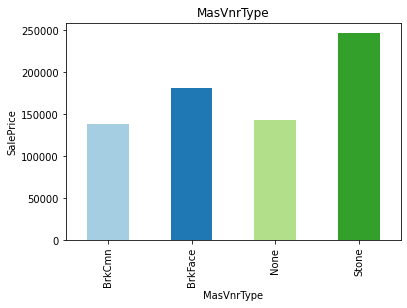

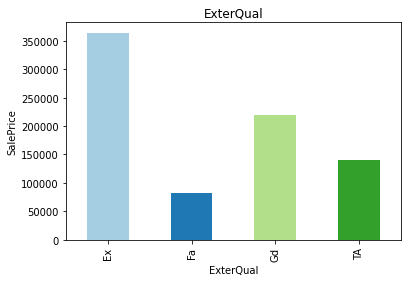

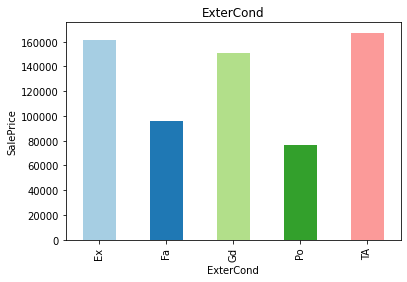

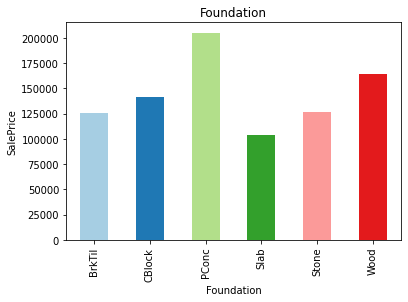

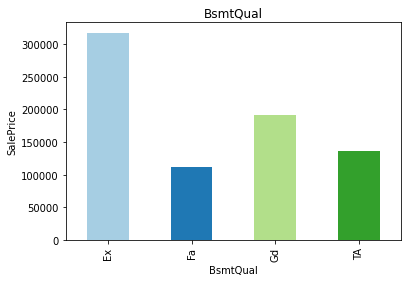

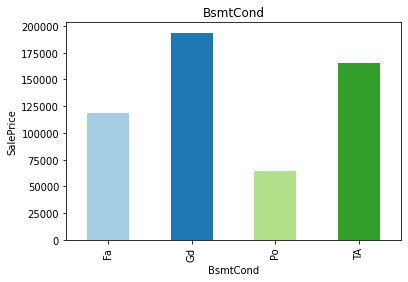

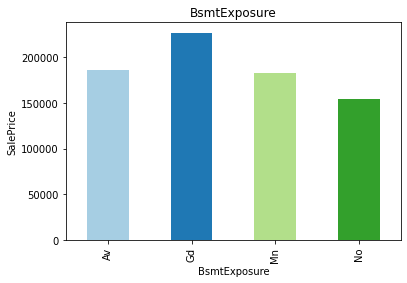

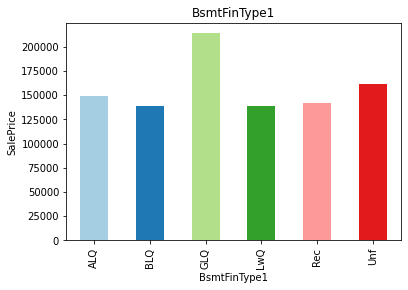

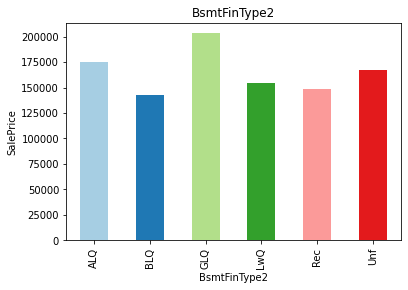

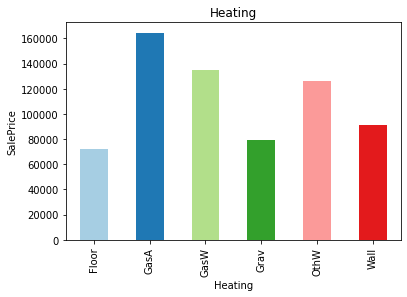

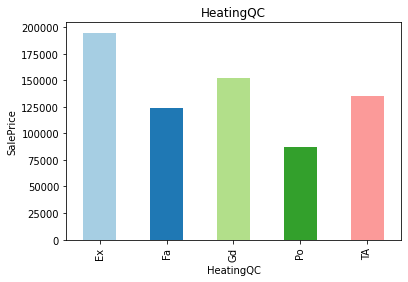

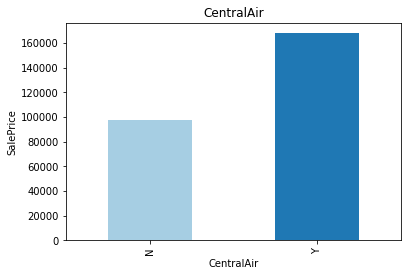

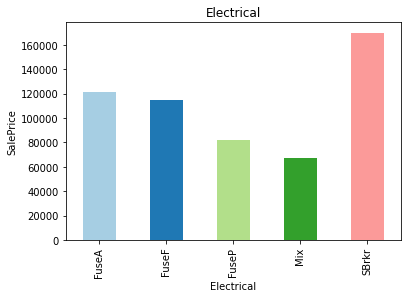

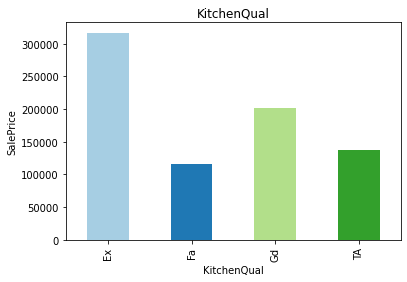

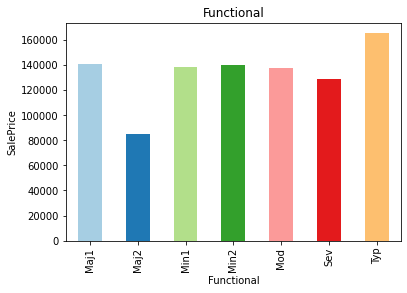

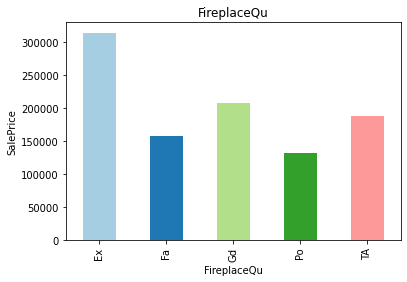

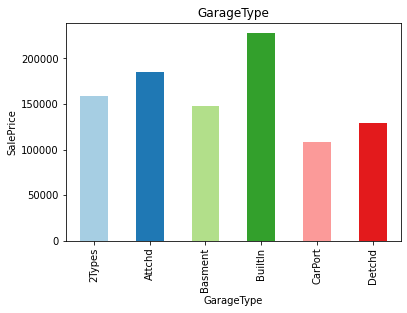

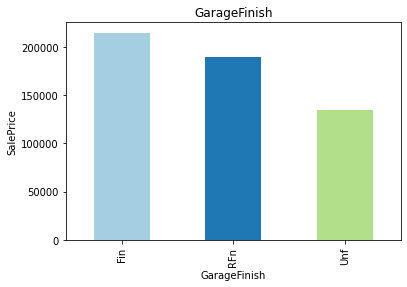

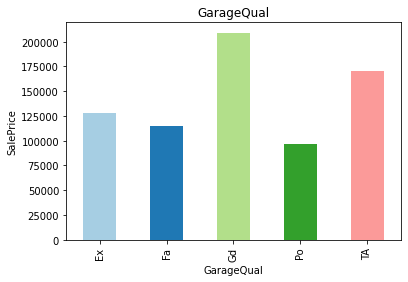

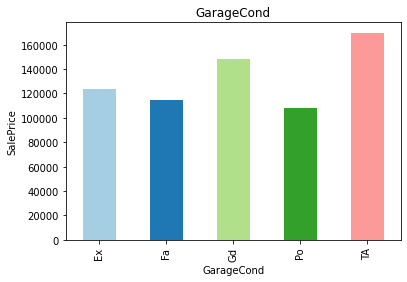

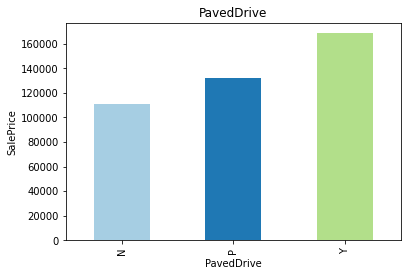

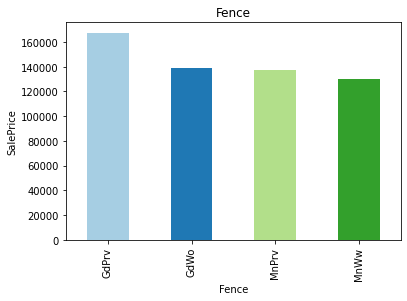

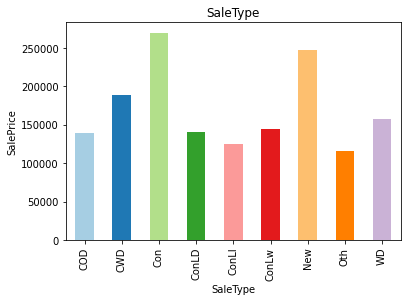

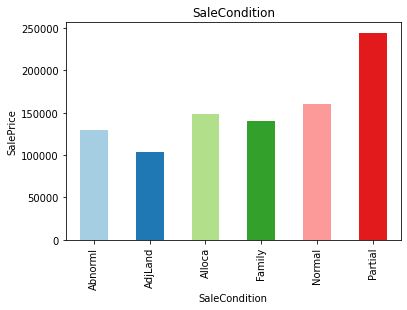

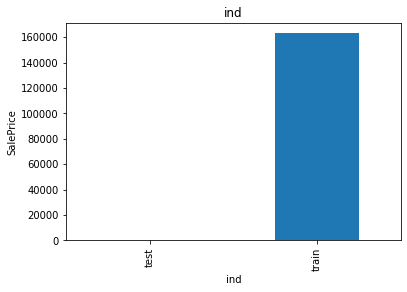

In [21]:
for feature in df_train_categorical:
    N=25
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar(color=plt.cm.Paired(np.arange(N)))
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

### Handling numerical missing value

In [22]:
numerical_with_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes!='O']#是否為非object
numerical_with_nan.remove('SalePrice')
numerical_with_nan

['LotFrontage', 'MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt']

In [23]:
# full the missing value of numerical features
for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value=df[feature].median()
    df[feature].fillna(median_value,inplace=True)
    
df[numerical_with_nan].isnull().sum()

LotFrontage     0
MasVnrArea      0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
dtype: int64

## 2. Handling Tamporal Variable

In [24]:
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    df[feature]=df['YrSold']-df[feature]

In [25]:
df[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,49,49,49.0
1,52,52,52.0
2,13,12,13.0
3,12,12,12.0
4,18,18,18.0


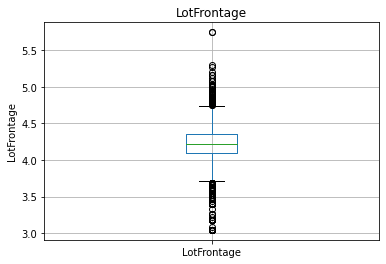

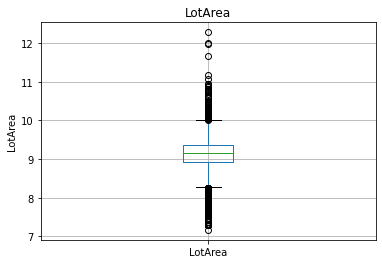

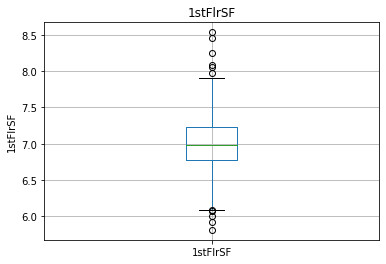

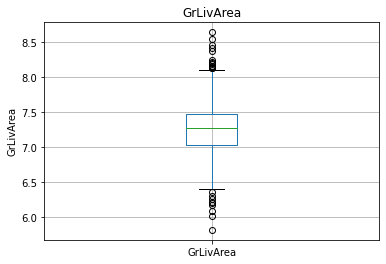

In [26]:
for feature in continous_df:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [28]:
import numpy as np
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']

for feature in num_features:
    df[feature]=np.log(df[feature])

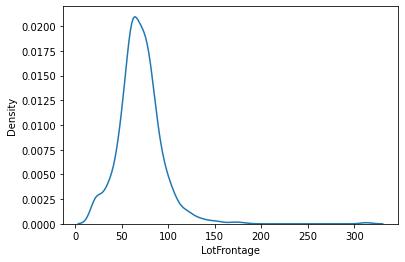

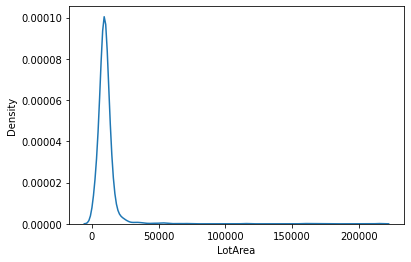

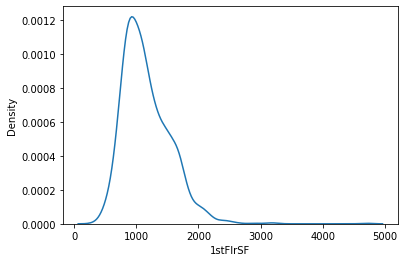

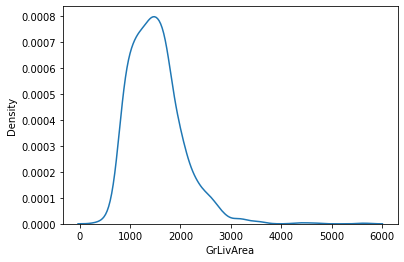

In [29]:
for feature in num_features:
    sns.kdeplot(data=df_train, x=feature,  legend=True)
    plt.show()

In [31]:
num_feature=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

def iqr_feature(features, df):
    dict = {}
    max_lmt = []
    min_lmt=[]
    for feature in features:
        q1 = df[feature].quantile(0.25)
        q2 = df[feature].quantile(0.75)
        IQR = q2 - q1
#         iqr.append(IQR)
        max_limit = q2 + (1.5 * IQR)
        max_lmt.append(max_limit)
        min_limit = q1 - (1.5 * IQR) 
        min_lmt.append(min_limit)
#         dict.update({feature: [min_limit,max_limit]})
#     return dict
    return max_lmt, min_lmt
    
max_lmt, min_lmt= iqr_feature(num_feature, df)
max_lmt,min_lmt

([4.750255223390829,
  10.01084566326038,
  7.925097815322388,
  8.119484349436728,
  340037.5],
 [3.7007981655208635,
  8.265045593678952,
  6.0855270563047945,
  6.3705922842573806,
  3937.5])

In [32]:
s1 = pd.Series(max_lmt)
s2 = pd.Series(min_lmt)


df_min_max = pd.DataFrame(list(zip(num_feature,s1, s2)), columns=['num_features','max_lmt','min_lmt'])
df_min_max
    

,num_features,max_lmt,min_lmt
0,LotFrontage,4.750255,3.700798
1,LotArea,10.010846,8.265046
2,1stFlrSF,7.925098,6.085527
3,GrLivArea,8.119484,6.370592
4,SalePrice,340037.500000,3937.500000


In [36]:
df.shape

(2919, 79)

In [37]:
# df_new = df[(df["LotFrontage"]>3.700798) & (df["LotFrontage"]<4.750255)]
# df_new.shape
df["LotFrontage"]= np.where((df["LotFrontage"]<3.700798), df['LotFrontage'].quantile(0.05),df['LotFrontage'])
df["LotFrontage"]= np.where((df["LotFrontage"]>4.750255), df['LotFrontage'].quantile(0.95),df['LotFrontage'])
df.shape

(2919, 79)

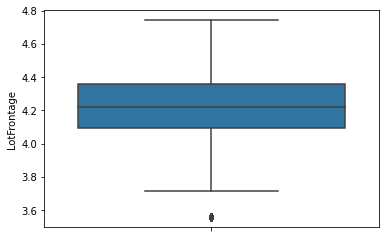

In [38]:
sns.boxplot( y=df["LotFrontage"]);
plt.show()

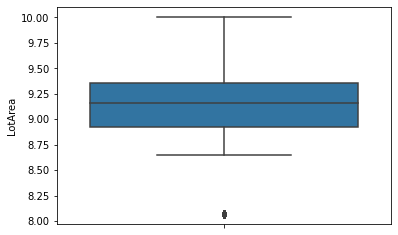

In [41]:
#將原本小於8.65046的值以5百分位做更換,大於10.010846的值以95百分位做更換
df["LotArea"]= np.where((df["LotArea"]<8.65046), df['LotArea'].quantile(0.05),df['LotArea'])
df["LotArea"]= np.where((df["LotArea"]>10.010846), df['LotArea'].quantile(0.95),df['LotArea'])
sns.boxplot( y=df["LotArea"]);
plt.show()

In [39]:
df["1stFlrSF"]= np.where((df["1stFlrSF"]<6.085527), df['1stFlrSF'].quantile(0.05),df['1stFlrSF'])
df["1stFlrSF"]= np.where((df["1stFlrSF"]>7.925098), df['1stFlrSF'].quantile(0.95),df['1stFlrSF'])
df.shape

(2919, 79)

In [40]:
df["GrLivArea"]= np.where((df["GrLivArea"]<6.370592), df['GrLivArea'].quantile(0.05),df['GrLivArea'])
df["GrLivArea"]= np.where((df["GrLivArea"]>8.119484), df['GrLivArea'].quantile(0.95),df['GrLivArea'])
df.shape

(2919, 79)

In [42]:
df["SalePrice"]= np.where((df["SalePrice"]<3937.500000), df['SalePrice'].quantile(0.05),df['SalePrice'])
df["SalePrice"]= np.where((df["SalePrice"]>340037.500000), df['SalePrice'].quantile(0.95),df['SalePrice'])
df.shape

(2919, 79)

In [43]:
df['SalePrice'].tail()

1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, dtype: float64

## Handling Rare Categorical Feature

We will remove categorical variables that are present less than 1% of the observations

In [44]:
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']
categorical_features.remove('ind')

In [45]:
for feature in categorical_features:
    print((df[feature].value_counts()))

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64
Pave    2907
Grvl      12
Name: Street, dtype: int64
Reg    1859
IR1     968
IR2      76
IR3      16
Name: LotShape, dtype: int64
Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64
AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64
Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64
Gtl    2778
Mod     125
Sev      16
Name: LandSlope, dtype: int64
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, dtype: int64
Norm      2511
Feedr      164
Artery 

In [46]:
#將所佔低於1%分類值歸為'Rare_val'
for feature in categorical_features:
    temp=df.groupby(feature)['SalePrice'].count()/len(df)
    temp_df=temp[temp>0.01].index
    df[feature]=np.where(df[feature].isin(temp_df),df[feature],'Rare_var')
    

In [47]:
from sklearn.preprocessing import OrdinalEncoder

#### Target Guided Ordinal Encoding
1. Ordering the labels according to the target
2. Replace the labels by the joint probability of being 1 or 0

In [48]:
# Let the obeject features label by numbers
for feature in categorical_features:
    labels_ordered=df.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[feature]=df[feature].map(labels_ordered)

In [49]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,ind,SalePrice
0,1461,20,0,4.382027,9.360655,1,0,1,1,0,...,120,0,1,0,6,2010,2,2,test,NaN
1,1462,20,2,4.394449,9.565704,1,1,1,1,2,...,0,0,3,12500,6,2010,2,2,test,NaN
2,1463,60,2,4.304065,9.534595,1,1,1,1,0,...,0,0,1,0,3,2010,2,2,test,NaN
3,1464,60,2,4.356709,9.208138,1,1,1,1,0,...,0,0,3,0,6,2010,2,2,test,NaN
4,1465,120,2,3.761200,8.065265,1,1,3,1,0,...,144,0,3,0,1,2010,2,2,test,NaN


In [50]:
test, train = df[df["ind"].eq("test")], df[df["ind"].eq("train")]

In [55]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,0,4.382027,9.360655,1,0,1,1,0,...,0,0,120,0,1,0,6,2010,2,2
1,1462,20,2,4.394449,9.565704,1,1,1,1,2,...,0,0,0,0,3,12500,6,2010,2,2
2,1463,60,2,4.304065,9.534595,1,1,1,1,0,...,0,0,0,0,1,0,3,2010,2,2
3,1464,60,2,4.356709,9.208138,1,1,1,1,0,...,0,0,0,0,3,0,6,2010,2,2
4,1465,120,2,3.761200,8.065265,1,1,3,1,0,...,0,0,144,0,3,0,1,2010,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1,3.555348,8.065265,1,0,1,1,0,...,0,0,0,0,3,0,6,2006,2,2
1455,2916,160,1,3.555348,8.065265,1,0,1,1,0,...,0,0,0,0,3,0,4,2006,2,0
1456,2917,20,2,4.653960,9.903488,1,0,1,1,0,...,0,0,0,0,3,0,9,2006,2,0
1457,2918,85,2,4.127134,9.253496,1,0,1,1,0,...,0,0,0,0,1,700,7,2006,2,2


In [56]:
train.drop('ind', axis=1, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [57]:
nan_feature = [feature for feature in test.columns if test[feature].isnull().sum()>=1]
nan_feature.remove('GarageCars')

### Fill the missing value

In [60]:
for feature in nan_feature:
    ## We will replace by using median since there are outliers
    median_value=df[feature].median()
    test[feature].fillna(median_value,inplace=True)
    
test[nan_feature].isnull().sum()
for column in df:
    print(column,df[column].isnull().sum())

Id 0
MSSubClass 0
MSZoning 0
LotFrontage 0
LotArea 0
Street 0
LotShape 0
LandContour 0
Utilities 0
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
BldgType 0
HouseStyle 0
OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
RoofStyle 0
RoofMatl 0
Exterior1st 0
Exterior2nd 0
MasVnrType 0
MasVnrArea 0
ExterQual 0
ExterCond 0
Foundation 0
BsmtQual 0
BsmtCond 0
BsmtExposure 0
BsmtFinType1 0
BsmtFinSF1 1
BsmtFinType2 0
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
Heating 0
HeatingQC 0
CentralAir 0
Electrical 0
1stFlrSF 0
2ndFlrSF 0
LowQualFinSF 0
GrLivArea 0
BsmtFullBath 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
KitchenQual 0
TotRmsAbvGrd 0
Functional 0
Fireplaces 0
FireplaceQu 0
GarageType 0
GarageYrBlt 0
GarageFinish 0
GarageCars 1
GarageArea 1
GarageQual 0
GarageCond 0
PavedDrive 0
WoodDeckSF 0
OpenPorchSF 0
EnclosedPorch 0
3SsnPorch 0
ScreenPorch 0
PoolArea 0
Fence 0
MiscVal 0
MoSold 0
YrSold 0
SaleType 0
SaleCondition 0
ind 0
SalePrice 1459


In [61]:
md = test['GarageCars'].mode()
print(md)

0    2.0
dtype: float64


In [62]:
test['GarageCars'].fillna(2,inplace=True)

In [63]:
test.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 77, dtype: int64

In [65]:
y_data=train['SalePrice']
x_data=train.drop('SalePrice',axis=1)

In [66]:
x_data.shape, test.shape

((1460, 77), (1459, 77))

### Model Selection

In [67]:
from sklearn.model_selection import train_test_split

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2)
x_train.isnull().sum(), y_train.isnull().sum()

0

In [71]:
from sklearn.feature_selection import SelectPercentile

In [72]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(x_train, y_train)
mutual_info

array([0.00284465, 0.28311275, 0.13068801, 0.1692211 , 0.13339805,
       0.00494986, 0.09844272, 0.04501922, 0.        , 0.03018073,
       0.00195613, 0.44728574, 0.0318664 , 0.01631348, 0.03947956,
       0.080946  , 0.55461888, 0.10590475, 0.33963692, 0.26062878,
       0.0235474 , 0.022608  , 0.12174811, 0.13868372, 0.08324808,
       0.09024726, 0.31376061, 0.00563303, 0.19798107, 0.31920116,
       0.04375396, 0.07963234, 0.12709846, 0.10132022, 0.        ,
       0.00525601, 0.14909082, 0.36019673, 0.0021567 , 0.13085576,
       0.02807619, 0.03483795, 0.3302026 , 0.20104309, 0.01137414,
       0.50964467, 0.01832447, 0.        , 0.27292782, 0.08559615,
       0.07627328, 0.01953575, 0.29826883, 0.15830946, 0.02525365,
       0.16687829, 0.18958806, 0.20022494, 0.27566168, 0.24853399,
       0.34058942, 0.36198475, 0.06348922, 0.05098616, 0.06903203,
       0.08165989, 0.18682015, 0.01975974, 0.00288672, 0.01927092,
       0.        , 0.03089877, 0.00486917, 0.        , 0.01303

In [73]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)

OverallQual     0.554619
GrLivArea       0.509645
Neighborhood    0.447286
GarageArea      0.361985
TotalBsmtSF     0.360197
                  ...   
PoolArea        0.000000
BsmtHalfBath    0.000000
BsmtFinType2    0.000000
MoSold          0.000000
Utilities       0.000000
Length: 77, dtype: float64

In [74]:
## Selecting the top 80 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=80)
selected_top_columns.fit(x_train, y_train)

SelectPercentile(percentile=80,
                 score_func=<function mutual_info_regression at 0x7a253eeee680>)

In [75]:
X_train_top_80 = list(x_train.columns[selected_top_columns.get_support()])
len(X_train_top_80)

61

In [76]:
X_train_feature = x_train[x_train.columns[x_train.columns.isin(X_train_top_80)]]
X_test_feature = x_test[x_test.columns[x_test.columns.isin(X_train_top_80)]]
df_test_feature = test[test.columns[test.columns.isin(X_train_top_80)]]

### Linear Regression

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
model = LinearRegression()
model.fit(X_train_feature , y_train)
predictions = model.predict(X_test_feature)
pd.DataFrame(predictions)

,0
0,186348.633397
1,157277.027991
2,242019.636310
3,140193.905111
4,250921.186619
...,...
287,232856.379911
288,202363.373401
289,234191.732904
290,305607.307528


In [99]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score

In [83]:
# Analysis the result of training
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('Explained Variance Score (EVS):',explained_variance_score(y_test,predictions))
print('R2:',metrics.r2_score(y_test, predictions))

Mean Absolute Error(MAE): 16327.11814884181
Mean Squared Error(MSE): 452185170.15827644
Root Mean Squared Error (RMSE): 21264.64601535319
Explained Variance Score (EVS): 0.9019787636560821
R2: 0.9011061682497232


### Ridge

In [84]:
from sklearn.linear_model import Ridge

model_ridge = Ridge()
model_ridge.fit(X_train_feature , y_train)
ridge_predictions = model_ridge.predict(X_test_feature)

In [85]:
# Analysis the result of training
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, ridge_predictions))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, ridge_predictions))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, ridge_predictions)))
print('Explained Variance Score (EVS):',explained_variance_score(y_test,ridge_predictions))
print('R2:',metrics.r2_score(y_test, ridge_predictions))
print('R2 rounded:',(metrics.r2_score(y_test, ridge_predictions)).round(2))
r2 = r2_score(y_test, ridge_predictions)
r2_rounded = r2_score(y_test, ridge_predictions).round(2)

Mean Absolute Error(MAE): 16290.25088736524
Mean Squared Error(MSE): 451234422.79191285
Root Mean Squared Error (RMSE): 21242.279133650252
Explained Variance Score (EVS): 0.9021755299766406
R2: 0.9013140986647196
R2 rounded: 0.9


### Decision Tree

In [86]:
from sklearn.tree import DecisionTreeRegressor
model_DecisionTree = DecisionTreeRegressor()
model_DecisionTree.fit(X_train_feature , y_train)
DecisionTree_predictions = model_DecisionTree.predict(X_test_feature)

In [87]:
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, DecisionTree_predictions))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, DecisionTree_predictions))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, DecisionTree_predictions)))
print('Explained Variance Score (EVS):',explained_variance_score(y_test,DecisionTree_predictions))
print('R2:',metrics.r2_score(y_test, DecisionTree_predictions))
print('R2 rounded:',(metrics.r2_score(y_test, DecisionTree_predictions)).round(2))
r2 = r2_score(y_test, DecisionTree_predictions)
r2_rounded = r2_score(y_test, DecisionTree_predictions).round(2)

Mean Absolute Error(MAE): 23392.828767123287
Mean Squared Error(MSE): 1168204955.8424656
Root Mean Squared Error (RMSE): 34179.013383104924
Explained Variance Score (EVS): 0.744578136050293
R2: 0.7445111605219464
R2 rounded: 0.74


### Random Forest Classifier

In [100]:
# Parameters setting
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [89]:
# Select the best parameters
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [90]:
# Training
rf_random.fit(X_train_feature , y_train)
RandomForest_predictions = rf_random.predict(X_test_feature)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=20; total time=   0.5s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=5; total time=   0.1s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=5; total 

In [101]:
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, RandomForest_predictions))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, RandomForest_predictions))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, RandomForest_predictions)))
print('Explained Variance Score (EVS):',explained_variance_score(y_test,RandomForest_predictions))
print('R2:',metrics.r2_score(y_test, RandomForest_predictions))
print('R2 rounded:',(metrics.r2_score(y_test, RandomForest_predictions)).round(2))
r2 = r2_score(y_test, RandomForest_predictions)
r2_rounded = r2_score(y_test, RandomForest_predictions).round(2)

Mean Absolute Error(MAE): 14529.455510190095
Mean Squared Error(MSE): 383913155.8437847
Root Mean Squared Error (RMSE): 19593.701943323133
Explained Variance Score (EVS): 0.9168965092987025
R2: 0.9160373989544068
R2 rounded: 0.92


In [102]:
predictions = rf_random.predict(df_test_feature)

In [103]:
submission = pd.DataFrame({'Id': test.Id, 'SalePrice': predictions})

In [104]:
submission.to_csv(path_or_buf = 'submission.csv', \
                   sep = ',', index = False)

In [95]:
submission

,Id,SalePrice
0,1461,125319.076999
1,1462,149786.599652
2,1463,181597.596507
3,1464,188178.224227
4,1465,191964.244828
...,...,...
1454,2915,95869.223635
1455,2916,95137.649229
1456,2917,160106.792823
1457,2918,115576.244250



[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=5; total time=   0.1s
[CV] END bootstrap=False, max_depth=110, max_fea